<a href="https://colab.research.google.com/drive/1V2eIDX8t-mB6KZ4NGlH69ZMR0Jts7zVp">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [0]:
import torch
import numpy as np

In [0]:
x = torch.ones(1, requires_grad=True)
print(x.grad)

None


In [0]:
y = x + 1
z = y * y * 2

z.backward()
print(x.grad)

tensor([8.])


In [0]:
class Perceptron(torch.nn.Module):
  def __init__(self):
    super(Perceptron, self).__init__()

    # This is our layer which acts as a dot product
    INPUT_SIZE = 1
    OUTPUT_SIZE = 1
    self.fully_connected_layer = torch.nn.Linear(INPUT_SIZE, OUTPUT_SIZE)

    # self.activation_function = Heaviside Step Function (only for classification)


  # Make a prediction
  def forward(self, input):
    weighted_sum = self.fully_connected_layer(input)
    return weighted_sum


  # Train
  def train(self, data):
    NUM_EPOCHS = 500
    ALPHA = 0.001

    loss_function = torch.nn.L1Loss()
    optimizer = torch.optim.SGD(self.parameters(), lr=ALPHA)    # haven't learned yet, but the way we want to optimize the weights

    for epoch in range(NUM_EPOCHS):
      for i, data_point in enumerate(data):
        # define our (x, y) as a "Tensor", an array in PyTorch
        x, y = iter(data_point)
        x = torch.Tensor([x])
        y = torch.Tensor([y])

        optimizer.zero_grad()               # reset gradients from previous iteration

        y_pred = model(x)                   # make a prediction
        loss = loss_function(y_pred, y)     # calculate loss

        loss.backward()                     # computes dloss/dw
        optimizer.step()                    # updates weights

        if epoch % 100 == 0 and i == 0:
          print("Epoch {} - loss: {}".format(epoch, loss.data))

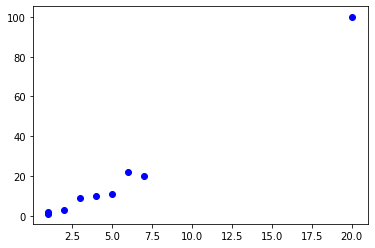

In [0]:
data = torch.Tensor([(1,1), (1,2), (2,3), (3,9), (4,10), (5,11), (6,22), (7,20), (20, 100)])

import matplotlib.pyplot as plt
for x,y in data:
  plt.scatter(x,y, color='b')

In [0]:
# Create & Train model
model = Perceptron()
model.train(data)
# model.eval() does the same thing as model.train() but in "evaluation" mode

# Test our model
x_test = torch.Tensor([15])
y_pred = model(x_test)
print(y_pred)

Epoch 0 - loss: 0.5733660459518433
Epoch 100 - loss: 2.932640552520752
Epoch 200 - loss: 2.7326369285583496
Epoch 300 - loss: 2.532644748687744
Epoch 400 - loss: 2.3326468467712402
tensor([56.4774], grad_fn=<AddBackward0>)


What is a **tensor**? It's just an **n-dimensional array** in PyTorch. Basically, the same thing what an nparray is to numpy.